In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

In [3]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [4]:
# generate phase
theta = t * 2*np.pi * freq   

In [5]:
# generate signal by cosine-phasor
s = np.sin(theta)

Text(0, 0.5, 'real')

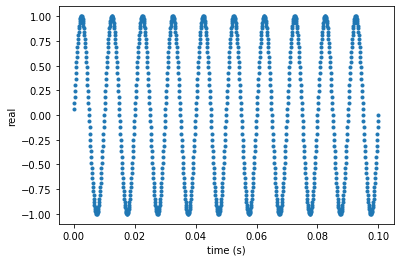

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [7]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

Text(0.5, 0, 'imag')

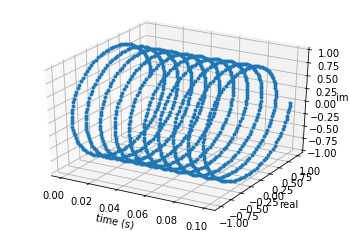

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [9]:
ipd.Audio(s, rate=sr)

# Generate pulse train

- sr과 freq가 연결되는 부분 있음
- sr이 100Hz라고 해보면(우리가 표현할 수 있는 숫자의 개수 100개) 이 100개의 숫자를 가지고 1Hz 표현할 수 있을까? 있다 한번의 사인 웨이브 나타내 주면 됨 2Hz가능? 가능 두번 보여주면 됨 ... 그렇다면 주어진 100개의 숫자로 10000번을 1초 동안 왔다갔다하게(10000Hz) 할 수 있을까? 할 수 없음 우리가 가진 숫자 너무 작기때문 
- sr을 충분히 가지고 있어야 1초에 나타낼 수 있는 주파수 커짐

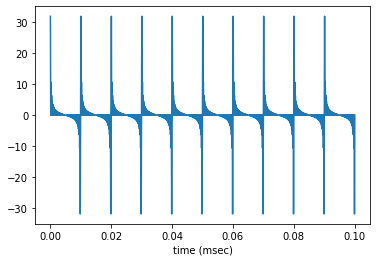

In [10]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0): #for 루프로 반복 
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp #기존 s에 새로 만들어진 tmp를 더하고 더하고 더함
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

- 시간은 먼저 설정됐다고 가정 phasor 만들 때 제일 먼저 time 만들고 theta, radian 값 만들고 이걸 sin에 입력 
- 위의 코드를 통해 freq 조절 가능
- 제일 낮은 주파수 F0 = 100으로 설정, 어디까지 배수를 올릴 수 있는가 그 끝은 sr의 절반 즉, nyquist frequency까지, 만약 이걸 더 올리고 싶으면 sr을 올려야 함 
- range(F0, Fend+1, F0) F0부터 Fend까지 F0의 간격(=100)만큼 늘려나감: 세번째 논항은 얼마의 간격으로 늘려나가는지 나타내는 것

Q. freq가 제일 처음 들어갈 때 s 값이 뭔지 정의가 되어 있지 않기 때문에 에러 메세지 나옴 -> s = np.zeros(len(t))를 통해 제일 처음 for 루프 돌기 전에 가장 초기의 s값이 무엇인지 정의해주어야 함 위에서 만든 time벡터의 개수만큼 0을 만들어줌 000..00 여기에 사인웨이브를 계속 만들어서 더해지는 과정 

마지막에 다 더해지면 s가 다 더해진 상태로 남는데 그 s를 plot 시켜봄 다 할 수는 없으니 1000번째 까지만 ax.plot(t[0:1000], s[0:1000])

In [11]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [12]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 440.0     # sine frequency, Hz

In [13]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [14]:
# generate phase
theta = t * 2*np.pi * freq   

In [15]:
# generate signal by cosine-phasor
s = amp*np.cos(theta) #sin대신 cos 곱하면 모양 자체는 똑같으나 시작점 달라짐 

<IPython.core.display.Javascript object>


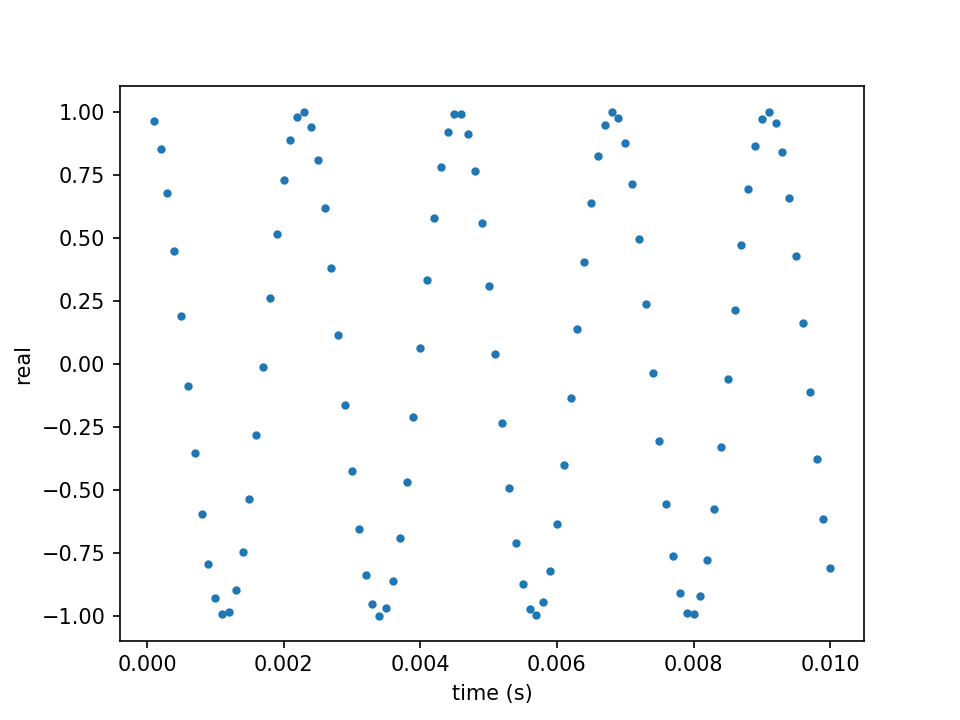

Text(0, 0.5, 'real')

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

- 지금 cos그래프인데 이게 90도 ㅠ/2 이동하면 sin 됨
- 우리 귀는 각도(phase) 인식하지 못함 phase shift에 대해 인지하지 못함 frequency에 대한 인지는 함

- freq 440 '라'에 해당

In [17]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

In [18]:
c

array([0.96202767+2.72951936e-01j, 0.85099448+5.25174630e-01j,
       0.67533281+7.37513117e-01j, ..., 0.85099448-5.25174630e-01j,
       0.96202767-2.72951936e-01j, 1.        +3.13806691e-14j])

<IPython.core.display.Javascript object>


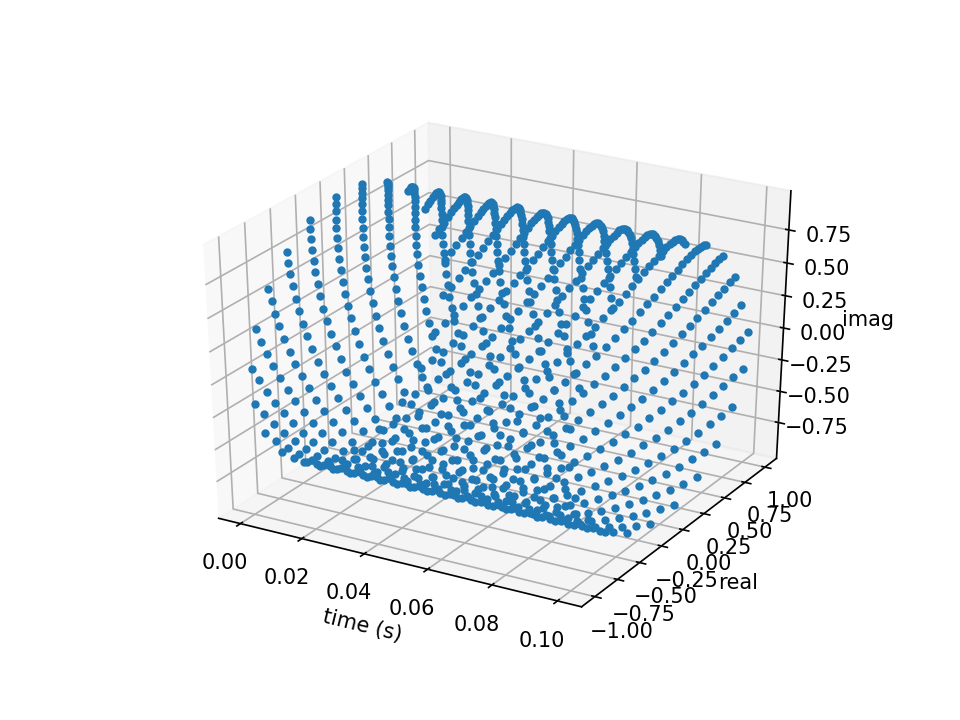

Text(0.5, 0, 'imag')

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [20]:
ipd.Audio(s, rate=sr)

<IPython.core.display.Javascript object>


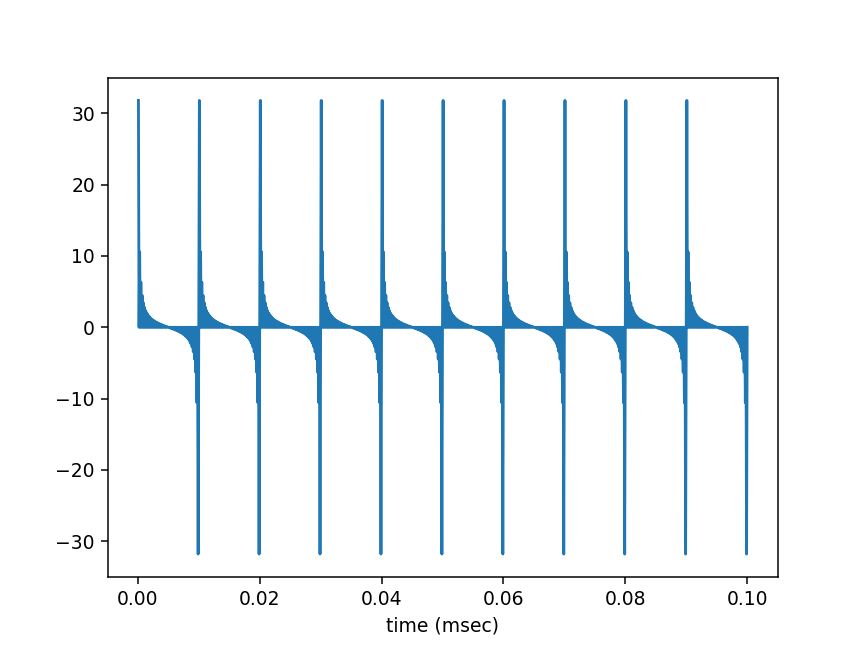

In [62]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0): #for 루프로 반복 
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp #기존 s에 새로 만들어진 tmp를 더하고 더하고 더함
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

- 이 그림은 wave form이지 spectrogram은 아님
- 이 그림의 한 포인트에 어떤 주파수가 많은지 보여주는 것이 spectrogram

In [21]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

- def 통해 새로운 function 정의
- return은 출력, return 없으면 결과값 아무것도 없음


In [22]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

- hz2w는 resonance내부적으로 쓰이는 것으로 실제 사용할 함수는 resonance 함수임
- 첫번째 입력 srate, 두번째 입력 (산맥의 위치, x축) Frequency 값, BW(band with)는 어떤 산을 만들 때 얼마나 이게 뾰쪽/뚱뚱한가 결정 만약 산맥이 뾰족하면 폭 짧음, with 짧음 산맥 뚱뚱하면 with 큼 
- 저주파 쪽에서 산맥이 크고 주파로 갈 수록 산맥 완만해짐


RG = 0 frequency 0Hz에서 시작, BWG = 100만큼 완만한 산을 만들라는 의미

In [23]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

- 500Hz에 산맥을 하나 만드는 것 
- 소리 점점 사람의 목소리랑 유사해짐

In [24]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [25]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [26]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

- 위에까지의 소리는 입술이 없을 때의 소리
- 입술이 있어야 소리가 더 공명이되어서 크게 퍼져 나감
- 아래의 s = lfilter(np.array([1, -1]), np.array([1]), s)를 통해 입술 있을때의 소리 구현 가능

In [27]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)